In [40]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from ctREFPROP.ctREFPROP import REFPROPFunctionLibrary
import os
from refprop_functions import *
import pandas as pd

# https://refprop-docs.readthedocs.io/en/latest/DLL/high_level.html#f/_/REFPROPdll

Text(0, 0.5, 'Voltage [V]')

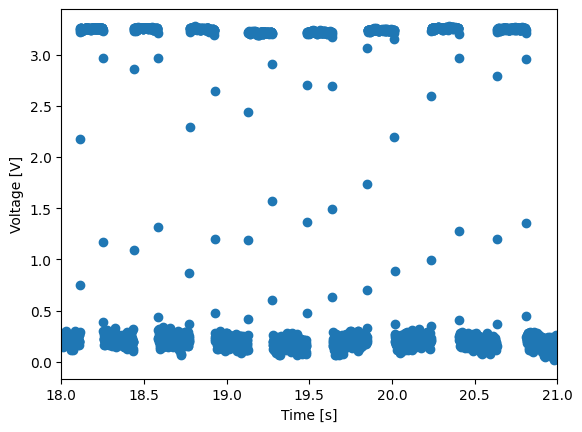

In [47]:
csvFile = pd.read_csv('putty_100k.csv')
array = csvFile.to_numpy()

odd = 1
time_vec = np.empty(np.shape(array)[0])
data_vec = np.empty(np.shape(array)[0])
for i in np.arange(0, np.shape(array)[0]):
	try:
		time_vec[i] = int(array[i][0])
	except:
		try:
			time_vec[i] = int(int(array[i-1][0])+700)
		except:
			time_vec[i] = int(int(array[i-2][0])+1400)
	try:
		data_vec[i] = int(array[i][1])
	except:
		try:
			data_vec[i] = int(int(array[i-1][1])+0.1)
		except:
			data_vec[i] = int(int(array[i-2][1])+0.2)
	if i > 2:
		dt = time_vec[i] - time_vec[i-1]
		if dt < 500 or dt > 2300:
			time_vec[i] = time_vec[i-1] + 700
		dv = data_vec[i] - data_vec[i-1]
		if dv > 1000:
			data_vec[i] = data_vec[i-1]
	
#print(data_vec)
plt.scatter(np.divide(time_vec, 1000000), np.multiply(data_vec, 5/1000))
#plt.plot(np.divide(time_vec, 1000000), np.multiply(data_vec, 5/1000))

#plt.ylim([0, 800])
#plt.xlim([20, 21.5])
plt.xlim([18, 21])
#plt.xlim([21.84, 21.86])
#plt.xlim([16.428, 16.432])
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")



12315
24975


Text(0, 0.5, 'Revolutions per second')

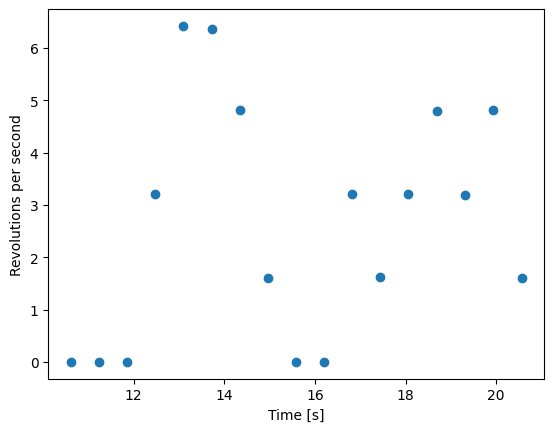

In [81]:
# Find the rpm from frequency

low_boundary = 0.5
high_boundary = 3.0
time_to_check_s = 0.5
elements_to_check = int(time_to_check_s * (10**6)/(700))

initial_index = 0
final_index = 0
initial_time = 10 * (10**6)
found_initial = False
found_final = False
final_time = 21 * (10**6)
num_to_look_back = 4

for i in np.arange(0, np.size(time_vec)):
	if time_vec[i] > initial_time and not found_initial:
		initial_index = i
		found_initial = True
	if time_vec[i] > final_time and not found_final:
		final_index = i
		found_final = True

range_to_check = np.arange(initial_index, final_index)

time_for_rps_counts = []
rps = []
rotations = 0
num_checked = 0	

for i in range_to_check:
	if num_checked > elements_to_check:
		time_passed = time_vec[i] - time_vec[i-elements_to_check]
		rps += [rotations/(time_passed/(10**6))]
		time_for_rps_counts += [time_vec[i]]
		num_checked = 0
		rotations = 0

	if data_vec[i] > (data_vec[i-3] + (2.5 * 200)):
		rotations += 1
	num_checked += 1

"""
pseudocode:

loop thru all voltages
	check time_checked worth of time
	if voltage now is > (voltage in past 4 entries + 2.5):
		rotations ++
	rps = rotations/time_checked
	rpm = rps * 60
"""
print(initial_index)
print(final_index)

plt.scatter(np.divide(time_for_rps_counts, 1000000), np.multiply(rps, 1))
plt.xlabel("Time [s]")
plt.ylabel("Revolutions per second")